In [177]:

import numpy as np
import pandas as pd
import csv
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import K2Score
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


## Marginal probabilities

In [178]:
cpd1 = pd. read_csv("ML1/Table2.csv")
print(cpd1)
x1, x2, x3, x4, x5, x6 = cpd1.iloc[:, 0:1], cpd1.iloc[:, 1:2], cpd1.iloc[:, 2:3], cpd1.iloc[:, 3:4], cpd1.iloc[:, 4:5], cpd1.iloc[:, 5:6]
x1 = x1.drop(4)
x3 = x3.drop([3,4])
x4 = x4.drop(4)
x5 = x5.drop(4)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)

     x1     x2     x3    x4     x5     x6 
0  0.780  0.275  0.18  0.715  0.375  0.015
1  0.015  0.320  0.66  0.105  0.110  0.320
2  0.055  0.025  0.16  0.010  0.105  0.140
3  0.150  0.170 -1.00  0.170  0.410  0.315
4 -1.000  0.210 -1.00 -1.000 -1.000  0.210
     x1 
0  0.780
1  0.015
2  0.055
3  0.150
     x2 
0  0.275
1  0.320
2  0.025
3  0.170
4  0.210
     x3
0  0.18
1  0.66
2  0.16
     x4 
0  0.715
1  0.105
2  0.010
3  0.170
     x5 
0  0.375
1  0.110
2  0.105
3  0.410
     x6 
0  0.015
1  0.320
2  0.140
3  0.315
4  0.210


## Distributions conditioned on x1

In [179]:
cpd1 = pd. read_csv("ML1/Table3.csv")
cpd1 = cpd1.drop(['x1'], axis=1)
x2_x1, x4_x1, x6_x1 = cpd1.iloc[0:5, :], cpd1.iloc[5:9, :], cpd1.iloc[9:, :]
x2_x1 = x2_x1.reset_index(drop=True)
x4_x1 = x4_x1.reset_index(drop=True)
x6_x1 = x6_x1.reset_index(drop=True)
x1_total = {'x01': [0.78], 'x11': [0.015], 'x21': [0.055], 'x31': [0.15]}
x1_total = pd.DataFrame(x1_total, index=[0])
print(x1_total)
print(x2_x1)
print(x4_x1)
print(x6_x1)

    x01    x11    x21   x31
0  0.78  0.015  0.055  0.15
    x01     x11   x21    x31 
0  0.231  0.666  0.455  0.400
1  0.365  0.000  0.091  0.200
2  0.026  0.000  0.000  0.033
3  0.173  0.000  0.182  0.167
4  0.205  0.333  0.273  0.200
    x01   x11   x21    x31 
0  0.737  1.0  0.727  0.567
1  0.077  0.0  0.273  0.200
2  0.013  0.0  0.000  0.000
3  0.173  0.0  0.000  0.233
    x01     x11   x21   x31 
0  0.019  0.000  0.000   0.0
1  0.282  0.666  0.545   0.4
2  0.128  0.333  0.091   0.2
3  0.352  0.000  0.182   0.2
4  0.218  0.000  0.182   0.2


## Distributions conditioned on x2

In [180]:
cpd1 = pd. read_csv("ML1/Table4.csv")
# print(cpd1)
cpd1 = cpd1.drop(['x2'], axis=1)
x3_x2, x5_x2 = cpd1.iloc[0:3, :], cpd1.iloc[3:, :]
x3_x2 = x3_x2.reset_index(drop=True)
x5_x2 = x5_x2.reset_index(drop=True)
x2_total = {'x02': [0.275], 'x12': [0.32], 'x22': [0.025], 'x32': [0.17], 'x42': [0.21]}
x2_total = pd.DataFrame(x2_total, index=[0])
print(x2_total)
print(x3_x2)
print(x5_x2)

     x02   x12    x22   x32   x42
0  0.275  0.32  0.025  0.17  0.21
     x02   x12   x22    x32    x42 
0  0.127  0.266   0.2  0.176  0.119
1  0.745  0.656   0.8  0.706  0.500
2  0.127  0.078   0.0  0.118  0.381
     x02   x12   x22    x32    x42 
0  0.418  0.344   0.6  0.382  0.334
1  0.073  0.109   0.4  0.147  0.095
2  0.109  0.125   0.0  0.118  0.071
3  0.400  0.422   0.0  0.353  0.500


## Distributions conditioned on x3

In [181]:
cpd1 = pd. read_csv("ML1/Table5.csv")
# print(cpd1)
cpd1 = cpd1.drop(['x3'], axis=1)
x2_x3, x5_x3, x6_x3 = cpd1.iloc[0:5, :], cpd1.iloc[5:9, :], cpd1.iloc[9:, :]
x2_x3 = x2_x3.reset_index(drop=True)
x5_x3 = x5_x3.reset_index(drop=True)
x6_x3 = x6_x3.reset_index(drop=True)
x3_total = {'x03': [0.18], 'x13': [0.66], 'x23': [0.16]}
x3_total = pd.DataFrame(x3_total, index=[0])
print(x3_total)
print(x2_x3)
print(x5_x3)
print(x6_x3)

    x03   x13   x23
0  0.18  0.66  0.16
    x03      x13   x23 
0  0.194  0.3110  0.219
1  0.472  0.3180  0.156
2  0.028  0.0303  0.000
3  0.167  0.1820  0.125
4  0.139  0.1590  0.500
    x03     x13   x23 
0  0.361  0.394  0.313
1  0.083  0.114  0.125
2  0.222  0.091  0.031
3  0.333  0.402  0.531
    x03     x13   x23 
0  0.000  0.023  0.000
1  0.389  0.318  0.250
2  0.083  0.152  0.156
3  0.361  0.303  0.313
4  0.167  0.205  0.281


## Distributions conditioned on x4

In [182]:
cpd1 = pd. read_csv("ML1/Table6.csv")
# print(cpd1)
cpd1 = cpd1.drop(['x4'], axis=1)
x1_x4, x2_x4, x6_x4 = cpd1.iloc[0:4, :], cpd1.iloc[5:9, :], cpd1.iloc[9:, :]
x1_x4 = x1_x4.reset_index(drop=True)
x2_x4 = x2_x4.reset_index(drop=True)
x6_x4 = x6_x4.reset_index(drop=True)
x4_total = {'x04': [0.715], 'x14': [0.105], 'x24': [0.01], 'x34': [0.17]}
x4_total = pd.DataFrame(x4_total, index=[0])
print(x4_total)
print(x1_x4)
print(x2_x4)
print(x6_x4)

     x04    x14   x24   x34
0  0.715  0.105  0.01  0.17
    x04    x14   x24     x34
0  0.804  0.571   1.0  0.794
1  0.021  0.000   0.0  0.000
2  0.056  0.143   0.0  0.000
3  0.119  0.286   0.0  0.206
    x04    x14   x24     x34
0  0.322  0.286   1.0  0.323
1  0.028  0.000   0.0  0.029
2  0.154  0.190   0.0  0.235
3  0.196  0.286   0.0  0.235
    x04    x14   x24     x34
0  0.021  0.000   0.0  0.000
1  0.280  0.571   0.0  0.353
2  0.154  0.143   0.0  0.088
3  0.329  0.190   0.5  0.323
4  0.217  0.095   0.5  0.235


## Distributions conditioned on x5

In [183]:
cpd1 = pd. read_csv("ML1/Table7.csv")
# print(cpd1)
cpd1 = cpd1.drop(['x5'], axis=1)
x2_x5, x3_x5 = cpd1.iloc[0:5, :], cpd1.iloc[5:, :]
x2_x5 = x2_x5.reset_index(drop=True)
x3_x5 = x3_x5.reset_index(drop=True)
x5_total = {'x05': [0.375], 'x15': [0.11], 'x25': [0.105], 'x31': [0.41]}
x5_total = pd.DataFrame(x5_total, index=[0])
print(x5_total)
print(x2_x5)
print(x3_x5)

     x05   x15    x25   x31
0  0.375  0.11  0.105  0.41
     x05   x15    x25     x35
0  0.307  0.182  0.286  0.268
1  0.293  0.318  0.381  0.329
2  0.040  0.091  0.000  0.000
3  0.173  0.227  0.190  0.146
4  0.182  0.182  0.143  0.256
     x05   x15    x25     x35
0  0.173  0.136  0.381  0.146
1  0.693  0.682  0.571  0.646
2  0.133  0.182  0.048  0.207


## Distributions conditioned on x6

In [184]:
cpd1 = pd. read_csv("ML1/Table8.csv")
# print(cpd1)
cpd1 = cpd1.drop(['x6'], axis=1)
x1_x6, x2_x6, x3_x6, x4_x6 = cpd1.iloc[0:4, :], cpd1.iloc[4:9, :], cpd1.iloc[9:12, :], cpd1.iloc[12:, :]
x1_x6 = x1_x6.reset_index(drop=True)
x2_x6 = x2_x6.reset_index(drop=True)
x3_x6 = x3_x6.reset_index(drop=True)
x4_x6 = x4_x6.reset_index(drop=True)
x6_total = {'x06': [0.015], 'x16': [0.32], 'x26': [0.14], 'x36': [0.315], 'x46': [0.21]}
x6_total = pd.DataFrame(x6_total, index=[0])
print(x6_total)
print(x1_x6)
print(x2_x6)
print(x3_x6)
print(x4_x6)

     x06   x16   x26    x36   x46
0  0.015  0.32  0.14  0.315  0.21
   x06    x16     x26   x36     x46
0   1.0  0.687  0.714  0.873  0.809
1   0.0  0.031  0.036  0.000  0.000
2   0.0  0.094  0.036  0.032  0.048
3   0.0  0.187  0.214  0.095  0.143
    x06    x16     x26   x36     x46
0  0.000  0.281  0.214  0.317  0.262
1  0.333  0.296  0.392  0.317  0.309
2  0.000  0.000  0.000  0.079  0.000
3  0.666  0.234  0.142  0.095  0.167
4  0.000  0.187  0.250  0.190  0.262
   x06    x16     x26   x36     x46
0   0.0  0.218  0.107  0.206  0.143
1   1.0  0.656  0.714  0.635  0.643
2   0.0  0.125  0.179  0.159  0.214
   x06    x16     x26   x36     x46
0   1.0  0.625  0.786  0.746  0.738
1   0.0  0.187  0.107  0.063  0.048
2   0.0  0.000  0.000  0.016  0.024
3   0.0  0.187  0.107  0.175  0.190


# Task 1: Evaluating correlations and independences 

In [185]:

dependence = np.zeros((7,7))
threshold = 0.14

# for dependencies on x1

x2_x1 = x2_x1.values
x1 = x1.values
x2 = x2.values

closeness = 0
for i in range(0,4):
    for j in range(0,5):
        closeness += abs( (x2_x1[j][i] * x1[i]) - (x1[i]*x2[j]))   #p(x2,x1) = p(x2|x1) p(x1)
print("Entropy for x2|x1 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[2][1] = 1;  

    
x4_x1 = x4_x1.values
x4 = x4.values

closeness = 0
for i in range(0,4):
    for j in range(0,4):
        closeness += abs( (x4_x1[j][i] * x1[i]) - (x1[i]*x4[j]) )
print("Entropy for x4|x1 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[4][1] = 1;


x6_x1 = x6_x1.values
x6 = x6.values

closeness = 0
for i in range(0,4):
    for j in range(0,5):
        closeness += abs( (x6_x1[j][i] * x1[i]) - (x1[i]*x6[j]))   
print("Entropy for x6|x1 is: ", closeness[0])
if closeness[0] > threshold:
    dependence[6][1] = 1;


Entropy for x2|x1 is:  0.15977
Entropy for x4|x1 is:  0.11943000000000004
Entropy for x6|x1 is:  0.16015500000000005


In [186]:
# for dependencies on x2

x3_x2 = x3_x2.values
x3 = x3.values

closeness = 0
for i in range(0,5):
    for j in range(0,3):
        closeness += abs((x3_x2[j][i] * x2[i]) - (x3[j]*x2[i]))   
print("Entropy for x3|x2 is: ", closeness[0])
if closeness[0] > threshold:
    dependence[3][2] = 1;


x5_x2 = x5_x2.values
x5 = x5.values

closeness = 0
for i in range(0,5):
    for j in range(0,4):
        closeness += abs((x5_x2[j][i] * x2[i]) - (x5[j]*x2[i]))   
print("Entropy for x5|x2 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[5][2] = 1;

Entropy for x3|x2 is:  0.21852500000000002
Entropy for x5|x2 is:  0.12926000000000004


In [187]:
# for dependencies on x3

x2_x3 = x2_x3.values

closeness = 0
for i in range(0,3):
    for j in range(0,5):
        closeness += abs( (x2_x3[j][i] * x3[i]) - (x2[j]*x3[i]))   
print("Entropy for x2|x3 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[2][3] = 1;


x5_x3 = x5_x3.values

closeness = 0
for i in range(0,3):
    for j in range(0,4):
        closeness += abs((x5_x3[j][i] * x3[i]) - (x5[j]*x3[i]))   
print("Entropy for x5|x3 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[5][3] = 1;
    

x6_x3 = x6_x3.values

closeness = 0
for i in range(0,3):
    for j in range(0,5):
        closeness += abs( (x6_x3[j][i] * x3[i]) - (x6[j]*x3[i]))   
print("Entropy for x6|x3 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[5][3] = 1;

Entropy for x2|x3 is:  0.21875800000000006
Entropy for x5|x3 is:  0.11551999999999997
Entropy for x6|x3 is:  0.09498000000000002


In [188]:
# for dependencies on x4

x1_x4 = x1_x4.values

closeness = 0
for i in range(0,4):
    for j in range(0,4):
        closeness += abs( (x1_x4[j][i] * x4[i]) - (x1[j]*x4[i]))   
print("Entropy for x1|x4 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[1][4] = 1;
    

x2_x4 = x2_x4.values

closeness = 0
for i in range(0,4):
    for j in range(0,4):
        closeness += abs( (x2_x4[j][i] * x4[i]) - (x2[j]*x4[i]))   
print("Entropy for x2|x4 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[2][4] = 1;


x6_x4 = x6_x4.values

closeness = 0
for i in range(0,4):
    for j in range(0,4):
        closeness += abs( (x6_x4[j][i] * x4[i]) - (x6[j]*x4[i]))   
print("Entropy for x6|x4 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[6][4] = 1;

Entropy for x1|x4 is:  0.11957000000000002
Entropy for x2|x4 is:  0.53425
Entropy for x6|x4 is:  0.11923999999999993


In [189]:
# for dependencies on x5

x2_x5 = x2_x5.values

closeness = 0
for i in range(0,4):
    for j in range(0,5):
        closeness += abs( (x2_x5[j][i] * x5[i]) - (x2[j]*x5[i]))   
print("Entropy for x2|x5 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[2][5] = 1;


x3_x5 = x3_x5.values

closeness = 0
for i in range(0,4):
    for j in range(0,3):
        closeness += abs( (x3_x5[j][i] * x5[i]) - (x3[j]*x5[i]))   
print("Entropy for x3|x5 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[3][5] = 1;

Entropy for x2|x5 is:  0.13126499999999997
Entropy for x3|x5 is:  0.11596500000000005


In [190]:
# for dependencies on x6

x1_x6 = x1_x6.values

closeness = 0
for i in range(0,5):
    for j in range(0,4):
        closeness += abs( (x1_x6[j][i] * x6[i]) - (x1[j]*x6[i]))   
print("Entropy for x1|x6 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[1][6] = 1;


x2_x6 = x2_x6.values

closeness = 0
for i in range(0,5):
    for j in range(0,5):
        closeness += abs( (x2_x6[j][i] * x6[i]) - (x2[j]*x6[i]))   
print("Entropy for x2|x6 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[2][6] = 1;


x3_x6 = x3_x6.values

closeness = 0
for i in range(0,5):
    for j in range(0,3):
        closeness += abs( (x3_x6[j][i] * x6[i]) - (x3[j]*x6[i]))   
print("Entropy for x3|x6 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[3][6] = 1;


x4_x6 = x4_x6.values

closeness = 0
for i in range(0,5):
    for j in range(0,4):
        closeness += abs( (x4_x6[j][i] * x6[i]) - (x4[j]*x6[i]))   
print("Entropy for x4|x6 is: ", closeness[0] )
if closeness[0] > threshold:
    dependence[4][6] = 1;

Entropy for x1|x6 is:  0.16036999999999996
Entropy for x2|x6 is:  0.17531500000000003
Entropy for x3|x6 is:  0.09434000000000006
Entropy for x4|x6 is:  0.14307000000000003


# Task 2: Constructing the Bayesian Network 

In [191]:
print("Let the threshold be",threshold)
#print(dependence)
for i in range (1,7):
    for j in range (1,7):
        if dependence[j][i] == 1:
            print("x", j , " depends on  x" , i)
            
K2Scores = np.zeros((6))

Let the threshold be 0.14
x 2  depends on  x 1
x 6  depends on  x 1
x 3  depends on  x 2
x 2  depends on  x 3
x 2  depends on  x 4
x 1  depends on  x 6
x 2  depends on  x 6
x 4  depends on  x 6


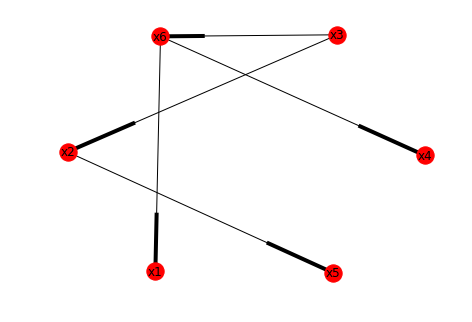

Model 1 K2 Score: -31637.394209334245


In [192]:
from pgmpy.sampling import BayesianModelSampling

model1 = BayesianModel([('x3', 'x2'), ('x3', 'x6'), ('x6', 'x1'), ('x6', 'x4'), ('x2', 'x5')])

cpd_x3 = TabularCPD(variable="x3",variable_card=3,values=x3)
cpd_x6_x3 = TabularCPD(variable="x6",variable_card=5,values=x6_x3, evidence=["x3"],evidence_card=[3])
cpd_x2_x3 = TabularCPD(variable="x2",variable_card=5,values=x2_x3, evidence=["x3"],evidence_card=[3])
cpd_x5_x2 = TabularCPD(variable="x5",variable_card=4,values=x5_x2, evidence=["x2"],evidence_card=[5])
cpd_x4_x6 = TabularCPD(variable="x4",variable_card=4,values=x4_x6, evidence=["x6"],evidence_card=[5])
cpd_x1_x6 = TabularCPD(variable="x1",variable_card=4,values=x1_x6, evidence=["x6"],evidence_card=[5])

model1.add_cpds(cpd_x3,cpd_x6_x3,cpd_x2_x3,cpd_x5_x2,cpd_x4_x6,cpd_x1_x6)

nx.draw(model1, with_labels=True)
plt.show()

# Bayesian Sampling
inference1 = BayesianModelSampling(model1)

data1 = inference1.forward_sample(size=5000)
# print(data1)

k2_model1 = K2Score(data1)
print('Model 1 K2 Score: ' + str(k2_model1.score(model1)))
K2Scores[1] = str(k2_model1.score(model1))
# print(K2Scores)

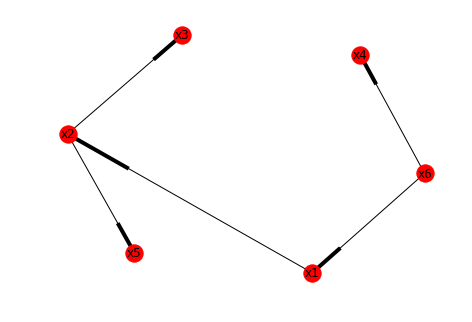

Model 2 K2 Score: -6454.381192177223


In [193]:
from pgmpy.sampling import BayesianModelSampling

model2 = BayesianModel([('x6', 'x1'), ('x6', 'x4'), ('x1', 'x2'), ('x2', 'x3'), ('x2', 'x5')])

cpd_x6 = TabularCPD(variable="x6",variable_card=5,values=x6)
cpd_x4_x6 = TabularCPD(variable="x4",variable_card=4,values=x4_x6, evidence=["x6"],evidence_card=[5])
cpd_x1_x6 = TabularCPD(variable="x1",variable_card=4,values=x1_x6, evidence=["x6"],evidence_card=[5])
cpd_x2_x1 = TabularCPD(variable="x2",variable_card=5,values=x2_x1, evidence=["x1"],evidence_card=[4])
cpd_x3_x2 = TabularCPD(variable="x3",variable_card=3,values=x3_x2, evidence=["x2"],evidence_card=[5])
cpd_x5_x2 = TabularCPD(variable="x5",variable_card=4,values=x5_x2, evidence=["x2"],evidence_card=[5])

model2.add_cpds(cpd_x6,cpd_x4_x6,cpd_x1_x6,cpd_x2_x1,cpd_x3_x2,cpd_x5_x2)

nx.draw(model2, with_labels=True)
plt.show()

# Bayesian Sampling
inference2 = BayesianModelSampling(model2)

data2 = inference2.forward_sample(size=1000)
# print(data2)

k2_model2 = K2Score(data2)
print('Model 2 K2 Score: ' + str(k2_model2.score(model2)))
K2Scores[2] = str(k2_model2.score(model2))
# print(K2Scores)

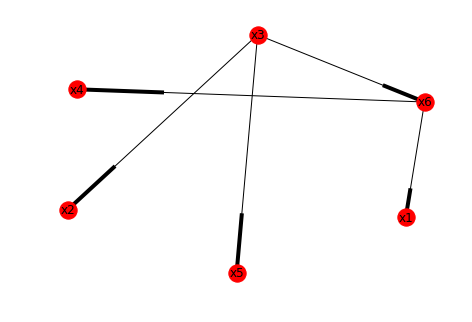

Model 3 K2 Score: -6450.72510606309


In [194]:
from pgmpy.sampling import BayesianModelSampling

model3 = BayesianModel([('x3', 'x6'), ('x3', 'x2'), ('x3', 'x5'), ('x6', 'x1'), ('x6', 'x4')])

cpd_x3 = TabularCPD(variable="x3",variable_card=3,values=x3)
cpd_x2_x3 = TabularCPD(variable="x2",variable_card=5,values=x2_x3, evidence=["x3"],evidence_card=[3])
cpd_x6_x3 = TabularCPD(variable="x6",variable_card=5,values=x6_x3, evidence=["x3"],evidence_card=[3])
cpd_x5_x3 = TabularCPD(variable="x5",variable_card=4,values=x5_x3, evidence=["x3"],evidence_card=[3])
cpd_x1_x6 = TabularCPD(variable="x1",variable_card=4,values=x1_x6, evidence=["x6"],evidence_card=[5])
cpd_x4_x6 = TabularCPD(variable="x4",variable_card=4,values=x4_x6, evidence=["x6"],evidence_card=[5])

model3.add_cpds(cpd_x3,cpd_x2_x3,cpd_x6_x3,cpd_x5_x3,cpd_x1_x6,cpd_x4_x6)

nx.draw(model3, with_labels=True)
plt.show()

# Bayesian Sampling
inference3 = BayesianModelSampling(model3)

data3 = inference3.forward_sample(size=1000)
# print(data3)

k2_model3 = K2Score(data3)
print('Model 3 K2 Score: ' + str(k2_model3.score(model3)))
K2Scores[3] = str(k2_model3.score(model3))
# print(K2Scores)

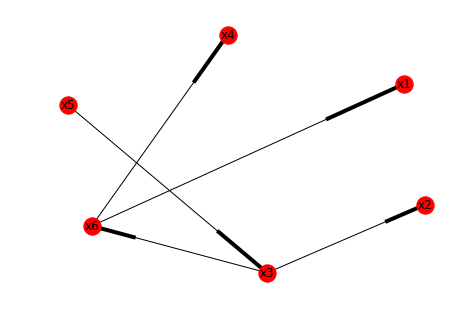

Model 4 K2 Score: -6372.160442577957


In [195]:
from pgmpy.sampling import BayesianModelSampling

model4 = BayesianModel([('x5', 'x3'), ('x3', 'x2'), ('x3', 'x6'), ('x6', 'x4'), ('x6', 'x1')])

cpd_x5 = TabularCPD(variable="x5",variable_card=4,values=x5)
cpd_x3_x5 = TabularCPD(variable="x3",variable_card=3,values=x3_x5, evidence=["x5"],evidence_card=[4])
cpd_x2_x3 = TabularCPD(variable="x2",variable_card=5,values=x2_x3, evidence=["x3"],evidence_card=[3])
cpd_x6_x3 = TabularCPD(variable="x6",variable_card=5,values=x6_x3, evidence=["x3"],evidence_card=[3])
cpd_x1_x6 = TabularCPD(variable="x1",variable_card=4,values=x1_x6, evidence=["x6"],evidence_card=[5])
cpd_x4_x6 = TabularCPD(variable="x4",variable_card=4,values=x4_x6, evidence=["x6"],evidence_card=[5])

model4.add_cpds(cpd_x5,cpd_x3_x5,cpd_x2_x3,cpd_x6_x3,cpd_x1_x6,cpd_x4_x6)

nx.draw(model4, with_labels=True)
plt.show()

# Bayesian Sampling
inference4 = BayesianModelSampling(model4)

data4 = inference4.forward_sample(size=1000)
# print(data4)

k2_model4 = K2Score(data4)
print('Model 4 K2 Score: ' + str(k2_model4.score(model4)))
K2Scores[4] = str(k2_model4.score(model4))
# print(K2Scores)

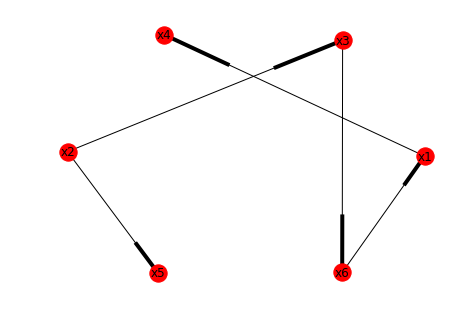

Model 5 K2 Score: -6400.304762834137

 
 K2 scores:
[     0.         -31637.39420933  -6454.38119218  -6450.72510606
  -6372.16044258  -6400.30476283]


In [196]:
from pgmpy.sampling import BayesianModelSampling

model5 = BayesianModel([('x2', 'x3'), ('x2', 'x5'), ('x3', 'x6'), ('x6', 'x1'), ('x1', 'x4')])

cpd_x2 = TabularCPD(variable="x2",variable_card=5,values=x2)
cpd_x3_x2 = TabularCPD(variable="x3",variable_card=3,values=x3_x2, evidence=["x2"],evidence_card=[5])
cpd_x5_x2 = TabularCPD(variable="x5",variable_card=4,values=x5_x2, evidence=["x2"],evidence_card=[5])
cpd_x6_x3 = TabularCPD(variable="x6",variable_card=5,values=x6_x3, evidence=["x3"],evidence_card=[3])
cpd_x1_x6 = TabularCPD(variable="x1",variable_card=4,values=x1_x6, evidence=["x6"],evidence_card=[5])
cpd_x4_x1 = TabularCPD(variable="x4",variable_card=4,values=x4_x1, evidence=["x1"],evidence_card=[4])

model5.add_cpds(cpd_x2,cpd_x3_x2,cpd_x5_x2,cpd_x6_x3,cpd_x1_x6,cpd_x4_x1)

nx.draw(model5, with_labels=True)
plt.show()

# Bayesian Sampling
inference5 = BayesianModelSampling(model5)

data5 = inference5.forward_sample(size=1000)
# print(data5)

k2_model5 = K2Score(data5)
print('Model 5 K2 Score: ' + str(k2_model5.score(model5)))
K2Scores[5] = str(k2_model5.score(model5))
print("\n \n K2 scores:")
print(K2Scores)

## Best model and inferences

In [197]:
max = -10000000
model_no = 0

for i in range(1,6):
    if(K2Scores[i]>max):
        max = K2Scores[i]
        model_no = i
        
print("The best bayesian model is model " + str(model_no))
best_model = eval("model" + str(model_no))
best_data = eval("data" + str(model_no))

countIncluded = best_data.groupby(best_data.columns.tolist()).size().reset_index().rename(columns={0:'count'})
print("high probability th is : ")
print(countIncluded.iloc[countIncluded['count'].idxmax()])
print()
print("low probability th is : ")
print(countIncluded.iloc[countIncluded['count'].idxmin()])



The best bayesian model is model 4
high probability th is : 
x5        0
x3        1
x2        1
x6        3
x4        0
x1        0
count    21
Name: 67, dtype: int64

low probability th is : 
x5       0
x3       0
x2       0
x6       1
x4       3
x1       0
count    1
Name: 1, dtype: int64


## Task 3: Convertiing to Markov model and comparing the inferences

The markov model is:
[('x5', 'x3'), ('x3', 'x2'), ('x3', 'x6'), ('x6', 'x4'), ('x6', 'x1')]


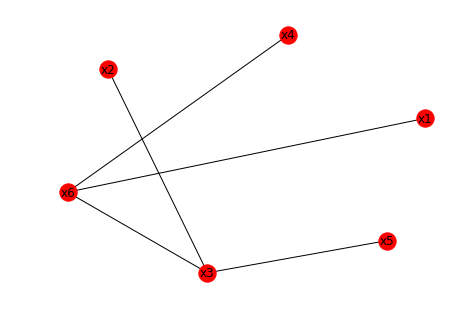

high probability th is : 
x5        0
x3        1
x2        0
x6        3
x4        0
x1        0
count    20
Name: 45, dtype: int64

low probability th is : 
x5       0
x3       0
x2       0
x6       1
x4       0
x1       2
count    1
Name: 1, dtype: int64


In [198]:
from pgmpy.sampling import GibbsSampling

print("The markov model is:")
model4_markov = best_model.to_markov_model()
print(model4_markov.edges())

inference_markov = GibbsSampling(model4_markov)
data_markov = inference_markov.sample(size=1000, return_type='dataframe')

nx.draw(model4_markov, with_labels = True)
plt.show()

countIncluded = data_markov.groupby(data_markov.columns.tolist()).size().reset_index().rename(columns={0:'count'})
print("high probability th is : ")

# print("row = " + str(countIncluded['count'].idxmax()) + " count = " + str(max(countIncluded['count'])))
print(countIncluded.iloc[countIncluded['count'].idxmax()])
print()
print("low probability th is : ")
# print("row = " + str(countIncluded['count'].idxmin()) + " count = " + str(min(countIncluded['count'])))
print(countIncluded.iloc[countIncluded['count'].idxmin()])



## Task 4: Bayesian and Markov network using the 'and' dataset


 
 The best bayesian network is:
[('f3', 'f4'), ('f3', 'f9'), ('f3', 'f8'), ('f5', 'f9'), ('f5', 'f3'), ('f9', 'f8'), ('f9', 'f7'), ('f9', 'f1'), ('f9', 'f6'), ('f9', 'f2'), ('f9', 'f4')]


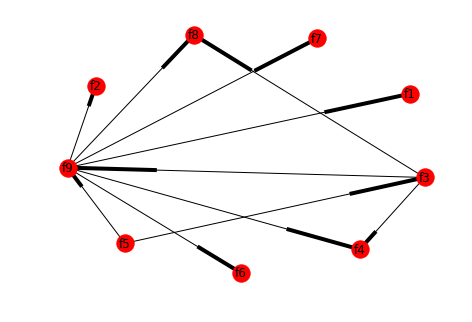

K2 Score: -9462.704892371386


CPD table for f1: 
 +-------+---------------------+---------------------+
| f9    | f9(1)               | f9(2)               |
+-------+---------------------+---------------------+
| f1(0) | 0.19823788546255505 | 0.10638297872340426 |
+-------+---------------------+---------------------+
| f1(1) | 0.44933920704845814 | 0.26032540675844806 |
+-------+---------------------+---------------------+
| f1(2) | 0.2643171806167401  | 0.3692115143929912  |
+-------+---------------------+---------------------+
| f1(3) | 0.0881057268722467  | 0.2640801001251564  |
+-------+---------------------+---------------------+

 
 The markov network is:
[('f3', 'f4'), ('f3', 'f9'), ('f3', 'f8'), ('f3', 'f5'), ('f4', 'f9'), ('f9', 'f8'), ('f9', 'f7'), ('f9', 'f1'), ('f9', 'f6'), ('f9', 'f2'), ('f9', 'f5')]


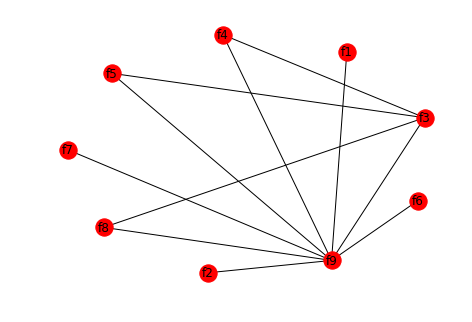

In [204]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

and_data = pd. read_csv("ML1/AND-Features.csv")
and_data = and_data.drop(['Unnamed: 0', 'img_id'], axis=1)
# print(and_data)

#Getting the best Bayesian model using the hill climbing search

hc = HillClimbSearch(and_data, scoring_method=K2Score(and_data))
best_model = hc.estimate()
and_model = BayesianModel(best_model.edges())

print("\n \n The best bayesian network is:")
print(best_model.edges())
nx.draw(and_model, with_labels = True)
plt.show()

k2_and = K2Score(and_data)
print('K2 Score: ' + str(k2_and.score(and_model)))

#Generating the CPDs
cpds = MaximumLikelihoodEstimator(and_model, and_data)
print("\n\nCPD table for f1: \n", cpds.estimate_cpd('f1'))
# cpd = cpds.get_parameters()


# for i in cpd:
#     print(i)


print("\n \n The markov network is:")
and_markov = and_model.to_markov_model()
print(and_markov.edges())

nx.draw(and_markov, with_labels = True)
plt.show()